# Notebook Kmeans Sargazo

In [1]:
import os
import cv2
import glob
import shutil
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from skimage.io import imread
#%matplotlib t
#%matplotlib qt
import pandas as pd

# Kmeans utilizando OpenCV

### **Parámetros de la función de OpenCV**

**samples :** It should be of np.float32 data type, and each feature should be put in a single column.

**nclusters(K):** Number of clusters required at end

**criteria:** It is the iteration termination criteria. When this criteria is satisfied, algorithm iteration stops. Actually, it should be a tuple of 3 parameters. They are `( type, max_iter, epsilon )`:
type of termination criteria. It has 3 flags as below:

cv.TERM_CRITERIA_EPS - stop the algorithm iteration if specified accuracy, epsilon, is reached.

cv.TERM_CRITERIA_MAX_ITER - stop the algorithm after the specified number of iterations, max_iter.

cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER - stop the iteration when any of the above condition is met.


**flags :** This flag is used to specify how initial centers are taken. Normally two flags are used for this : cv.KMEANS_PP_CENTERS and cv.KMEANS_RANDOM_CENTERS.

maxIterations is the maximum number of iterations to run.

epsilon determines the distance threshold within which we consider k-means to have converged.

## Definición de funciones 

In [89]:
#Función que tiene como resultado una lista con las etiquetas de cada pixel, los centroides, y el array para visualizar
#la imagen
def getKMeans2(img,K):
    Z = img.reshape((-1,3))
    # convert to np.float32
    Z = np.float32(Z)
    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    # Now convert back into uint8, and make original image
    #center = cm.get_cmap('Accent', K).colors
    #rgbCenter= [element[0:3] for element in center]
    #rgbCenter= np.array(rgbCenter)
    center = np.uint8(center)/256
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))
    unique, counts = np.unique(label, return_counts=True)
    return(label,center,res2,counts)

In [5]:
def getNorm(img):
    image_norm = cv2.normalize(img, None, alpha=0,beta=200, norm_type=cv2.NORM_MINMAX)
    return(image_norm)



## Ejemplos del Kmeans

In [97]:
#Cargado y preparado de la máscara. 
mascara = cv2.imread('mascara.jpg')
masc_gray = cv2.cvtColor(mascara, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(masc_gray, thresh=180, maxval=255, type=cv2.THRESH_BINARY)
mask2 = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

In [98]:
#Cargar la imagen que se quiere procesar
img = imread('1485538200.Fri.Jan.27_17_30_00.GMT.2017.morelos.c2.snap.png')
#bitwise aplica la máscara a la imágen
imgMask = cv2.bitwise_and(img, mask2)


<bound method Figure.show of <Figure size 1080x1080 with 2 Axes>>

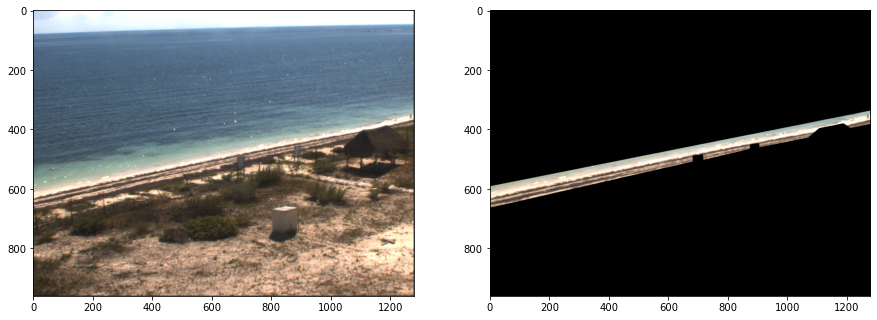

In [99]:
#Graficar la imagen con la máscara
fig, axs = plt.subplots(1, 2,figsize=(15,15))
axs[0].imshow(img)
axs[1].imshow(imgMask)
fig.show

### Gráfica histograma 

<bound method Figure.show of <Figure size 864x432 with 2 Axes>>

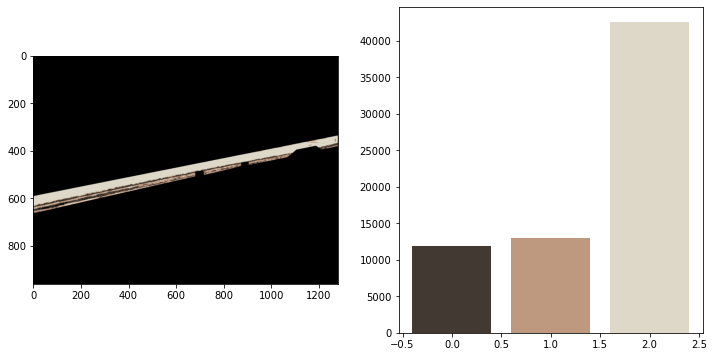

In [96]:
k = 4
label_hist,colors,ima,counts = getKMeans2(imgMask,k)
boolArr = colors >  0.01
d2 = boolArr[:, 0]
color2 = colors[d2]
counts = counts[d2]

# create a dataset
height = counts
x_pos = np.arange(k-1)

fig, axs = plt.subplots(1, 2,figsize=(12,6))
axs[0].imshow(ima)
axs[1].bar(x_pos, height, color=color2)

fig.show

#### Otro ejemplo

# Contar el sargazo

### Ejemplo de como funciona la función. 

In [31]:
def CuentaSargazo(img,K):
    Z = img.reshape((-1,3))
    # convert to np.float32
    Z = np.float32(Z)
    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    labelF=label.flatten()
    #colores centroides
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))
    unique, counts = np.unique(labelF, return_counts=True)
    normCenter= list(map(np.linalg.norm,center))
    ind_sarga = np.where(normCenter == sorted(normCenter)[1])[0][0]
    #ahora sí es el cluster más oscuro es decir el cluster el cluster con un valor menor rgb 
    CountSar = counts[ind_sarga]
    return(CountSar)

In [32]:
# Es la misma función pero sirve para ejemplificar como funciona
def CuentaSargazo_2(img,K):
    Z = img.reshape((-1,3))
    # convert to np.float32
    Z = np.float32(Z)
    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    labelF=label.flatten()
    #colores centroides
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))
    unique, counts = np.unique(labelF, return_counts=True)
    normCenter= list(map(np.linalg.norm,center))
    #eliminación del cluster negro!
    #normCenter = normCenter.remove(0)
    #ahora sí es el cluster más oscuro es decir el cluster el cluster con un valor menor rgb 
    #CountSar = counts[np.argmin(normCenter)]
    #cuent.append(CountSar)
    return(counts,center,normCenter)

In [ ]:
# Explicación de como funciona 

In [33]:
cuenta,color,norma = CuentaSargazo_2(imgMask,5)

In [34]:
cuenta

array([  10236, 1161277,   13276,   32419,   11592], dtype=int64)

In [35]:
color

array([[182, 144, 119],
       [  0,   0,   0],
       [254, 243, 224],
       [208, 203, 186],
       [ 64,  54,  49]], dtype=uint8)

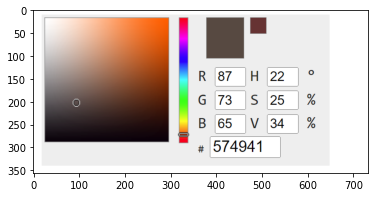

In [36]:
img_color = imread('color_pr.PNG')
plt.imshow(img_color)

In [37]:
norma

[260.8083587617544,
 0.0,
 416.8225041909326,
 345.0637622237374,
 97.02061636580135]

In [38]:
ind_sarga = np.where(norma == sorted(norma)[1])[0][0]
ind_sarga

4

In [39]:
cuenta[ind_sarga]

11592

## Conteo diversas imágenes

In [ ]:
# Función para obtener la fecha d ela imagen a partir del nombre...
# Nombre del archivo: 1609500600.Fri.Jan.01_11_30_00.GMT.2021.morelos.c1.snap
def getDateFromName2(imgName):        
    return(datetime.fromtimestamp(int(imgName.split('.')[0])).strftime("%m/%d/%Y-%H:%M:%S"))

In [ ]:
mascara = cv2.imread('mascara.jpg')
masc_gray = cv2.cvtColor(mascara, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(masc_gray, thresh=180, maxval=255, type=cv2.THRESH_BINARY)
mask2 = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

In [ ]:
#Path
imgPath= 'Carpeta_prueba/'


In [ ]:
K=5
camType = "c2" 
hour = '12:30:00'
hour2 = '12:00:00'

# Ruta a la carpeta donde estan las imagenes originales...
# Tipo de cámara que vamos a usar...
# Máscaras 
Fecha = []
Cuenta_ = []
# Estamos en debug (ver las imagenes)
for fileName in sorted(os.listdir(imgPath)):
    if camType in fileName: 
        imgDate = getDateFromName2(fileName)
        if hour  in imgDate:    
            imgO = imread(imgPath+fileName)
            imgMask = cv2.bitwise_and(imgO, mask2)
            CuentaSa = CuentaSargazo(imgMask,K)
            Cuenta_.append(CuentaSa)
            Fecha.append(imgDate)            
        if hour2  in imgDate:    
            imgO = imread(imgPath+fileName)
            imgMask = cv2.bitwise_and(imgO, mask2)
            CuentaSa = CuentaSargazo(imgMask,K)
            Cuenta_.append(CuentaSa)
            Fecha.append(imgDate)
        # Aumentamos el contador de imagenes..
    
    


# Dataframe

In [ ]:
CuentaKmeans = pd.DataFrame([Fecha,Cuenta_]).transpose()
CuentaKmeans.columns = ['Fecha_hora','Cuenta']
CuentaKmeans[['Fecha','Hora']] = CuentaKmeans.Fecha_hora.str.split("-",expand=True,)

In [ ]:
CuentaKmeans.head()

In [ ]:
CuentaKmeans.to_csv('CuentaKmeans_2017_arena.csv')

# Accuracy and F1 score

In [ ]:
def Acc(img,K):
    #cuent= []
    Z = img.reshape((-1,3))
    # convert to np.float32
    Z = np.float32(Z)
    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    labelF=label.flatten()
    # Now convert back into uint8, and make original image
    #center = np.uint8(center)/256
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))
    unique, counts = np.unique(labelF, return_counts=True)
    normCenter= list(map(np.linalg.norm,center))
    Clustsarga = np.argmin(normCenter)
    #cuent.append(CountSar)
    sargalist = [int(i == Clustsarga) for i in labelF]
    return(sargalist)

In [ ]:
def Average(lst):
    return sum(lst) / len(lst)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
imgPath1_test = 'imgtest/'
mascPath2_test = 'label_test/'

In [ ]:
masc = imread('m_1531166400.Mon.Jul.09_20_00_00.GMT.2018.morelos.png')
masc = cv2.cvtColor(masc, cv2.COLOR_BGR2GRAY)
_, masc = cv2.threshold(masc, thresh=180, maxval=255, type=cv2.THRESH_BINARY)
mask = cv2.cvtColor(masc, cv2.COLOR_GRAY2BGR)

In [ ]:
listpathPhoto = sorted(os.listdir(imgPath1_test))
listpathmasc = sorted(os.listdir(mascPath2_test))
K=5
accura = []
f1_score = []

for i in range(len(listpathPhoto)):
    image_n = imread(imgPath1_test + listpathPhoto[i])
    masc = imread(mascPath2_test+listpathmasc[i])
    masc = cv2.cvtColor(masc, cv2.COLOR_BGR2GRAY)
    _, masc2 = cv2.threshold(masc, thresh=180, maxval=255, type=cv2.THRESH_BINARY)
    
    #mult = cv2.multiply(masc, mascgen)
    imgMult=  cv2.bitwise_and(image_n, mask2)
    labelKmeans_ = Acc(imgMult,K)
    labelKmeans = np.array(labelKmeans_)
    
    
    label2 = masc2.flatten()
    for i in range (len(label2)):
        if label2[i] == 0:
            label2[i] = 1
        else:
            label2[i] = 0        
    labelmasc = label2.tolist()
    labelmasc = np.array(labelmasc)
    
    Nosar = np.where(labelmasc  == 0)[0]
    shapeNosar = len(Nosar)
    
    Sisar = np.where(labelmasc == 1)[0]
    shapeSisar = len(Sisar)
    
    NoSar_crop= Nosar[np.random.choice(np.arange(shapeNosar),shapeSisar)]
    
    finalindex = np.union1d(Sisar,NoSar_crop)
    
    labelmasc_crop = labelmasc[finalindex]
    labelKmeans_crop = labelKmeans[finalindex]

    precision = precision_score(labelmasc_crop,labelKmeans_crop)
    recall = recall_score(labelmasc_crop,labelKmeans_crop)
    F1 = 2 * (precision * recall) / (precision + recall)

    accu = sum(1 for x,y in zip(labelmasc_crop,labelKmeans_crop) if x == y) / len(labelmasc_crop)

    
    f1_score.append(F1)
    accura.append(accu)
    
    

    

In [ ]:
Accuracy = pd.DataFrame([f1_score,accura]).transpose()
Accuracy.columns = ['F1 score','Accuracy']


In [ ]:
Accuracy

In [ ]:
Accuracy['F1 score'].mean()

In [ ]:
Accuracy['Accuracy'].mean()

In [ ]:
imgMask2 = cv2.bitwise_and(imgMask2, mask)
plt.imshow(imgMask2)

In [ ]:
img2 = imread('1531166400.Mon.Jul.09_20_00_00.GMT.2018.morelos.c2.snap.png')
#img2 = getNorm(img2)
imgMask2 = cv2.bitwise_and(img2, mask2)
fig, axs = plt.subplots(1, 2,figsize=(15,15))
axs[0].imshow(img2)
axs[1].imshow(imgMask2)
fig.show


In [ ]:
k=5
label_hist,colors,ima = getKMeans2(imgMask2,5)

fig, axs = plt.subplots(1, 2,figsize=(12,6))
axs[0].imshow(ima)
cnts, values, bars = axs[1].hist(label_hist,bins = k,edgecolor='k')

for i, (cnt, value, bar) in enumerate(zip(cnts, values, bars)):
    bar.set_facecolor(colors[i % len(colors)])

fig.show